# Earned rewards per agent type


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os, sys, glob

In [7]:
os.chdir('C:\\Users\\annae\\Desktop\\pymdp_depression\\rewards_simulation_results')
df_c = pd.read_csv('earned_rewards_coop.csv')
df_h = pd.read_csv('earned_rewards_host.csv')

df_c = df_c.loc[:, ~df_c.columns.str.contains('^Unnamed')]
df_h = df_h.loc[:, ~df_h.columns.str.contains('^Unnamed')]

xlabels = ['Healthy', 'A: uncertainty', 'B: fatalistic', 'C: loss averse', 'D: pessimistic', 
          'Depression: insens.-pess.', 'Depression: fatalistic', 'SAD: insecure-avoidant', 'SAD: trauma-defeat']

df_c = df_c.rename(columns=dict(zip(df_c.columns, xlabels)))
df_h = df_h.rename(columns=dict(zip(df_h.columns, xlabels)))

In [8]:
results_c, results_h = dict(), dict()
names = list(df_c.columns)
std_err_c, std_err_h = [],[]

for player in names: 
    mean = df_c[player].mean()
    results_c[player] = mean
    std_err_c.append(df_c[player].std())
    
for player in names: 
    mean = df_h[player].mean()
    results_h[player] = mean
    std_err_h.append(df_h[player].std())
    


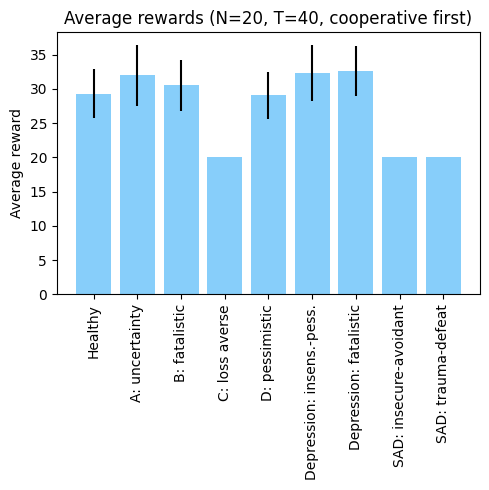

In [9]:
plt.figure(figsize=(5,5))
plt.title('Average rewards (N=20, T=40, cooperative first)')
plt.bar(results_c.keys(), results_c.values(), yerr=std_err_c, color='lightskyblue')
_=plt.xticks(xlabels, rotation=90)
_=plt.ylabel('Average reward')
plt.tight_layout()
plt.savefig('earned_rewards_coop.svg')

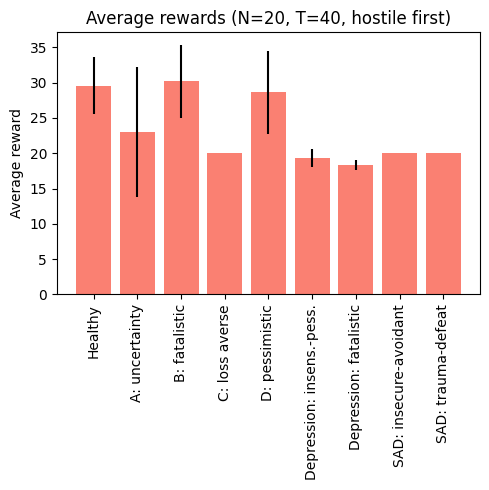

In [10]:
plt.figure(figsize=(5,5))
plt.title('Average rewards (N=20, T=40, hostile first)')
plt.bar(results_h.keys(), results_h.values(), yerr=std_err_h, color='salmon')
_=plt.xticks(rotation=90)
_=plt.ylabel('Average reward')
plt.tight_layout()
plt.savefig('earned_rewards_hostile.svg')

In [6]:
os.getcwd()

'C:\\Users\\annae\\Desktop\\pymdp_depression'

In [45]:
sorted(results_c)

['Player1_healthy',
 'Type1_depressed',
 'Type1_social_phobia',
 'Type2_depressed',
 'Type2_social_phobia',
 'biased_A',
 'biased_B',
 'biased_C',
 'biased_D']

In [50]:
sorted_c = sorted(results_c.items(), key=lambda x:x[1])
sorted_c

[('biased_C', 20.0),
 ('Type1_social_phobia', 27.625),
 ('biased_B', 29.875),
 ('Player1_healthy', 30.4),
 ('Type2_social_phobia', 30.475),
 ('biased_D', 30.575),
 ('biased_A', 31.6),
 ('Type1_depressed', 32.475),
 ('Type2_depressed', 32.525)]

In [51]:
sorted_h = sorted(results_h.items(), key=lambda x:x[1])
sorted_h

[('Type2_depressed', 18.525),
 ('Type1_depressed', 18.85),
 ('Type2_social_phobia', 19.125),
 ('Type1_social_phobia', 19.525),
 ('biased_A', 19.675),
 ('biased_C', 20.0),
 ('biased_D', 23.625),
 ('biased_B', 25.925),
 ('Player1_healthy', 27.75)]